In [1]:
import pandas as pd
import numpy as np
import folium
from folium import plugins
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sea

plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (18, 18)

In [2]:
location_df = pd.read_parquet("https://iudx-cat-sandbox-dev.s3.ap-south-1.amazonaws.com/bangalore-streetlight-data/streetlight-locations.parquet")
energy_df = pd.read_parquet("https://iudx-cat-sandbox-dev.s3.ap-south-1.amazonaws.com/bangalore-streetlight-data/streetlight-energy-data.parquet")

In [3]:
energy_df = energy_df.drop_duplicates()

In [4]:
rows = location_df["location.coordinates"].to_numpy()
device_ids = location_df["deviceID"].to_numpy()
co_ordinates =[]
for point in rows:
    lat = eval(point)[1]
    long = eval(point)[0]
    co_ordinates.append([lat, long])


In [5]:
map_view = folium.Map()
for device_id, co_ordinate in zip(device_ids, co_ordinates):
    folium.Marker(
        location=co_ordinate,
        popup=device_id
    ).add_to(map_view)
map_view.fit_bounds(map_view.get_bounds())

In [6]:
map_view

In [7]:
heatmap_view =folium.Map()
heatmap_view.add_child(plugins.HeatMap(co_ordinates, radius=15))
heatmap_view.fit_bounds(heatmap_view.get_bounds())
heatmap_view

In [8]:
energy_df['Hour'] = energy_df['observationDateTime'].dt.hour

Text(0, 0.5, 'power factor')

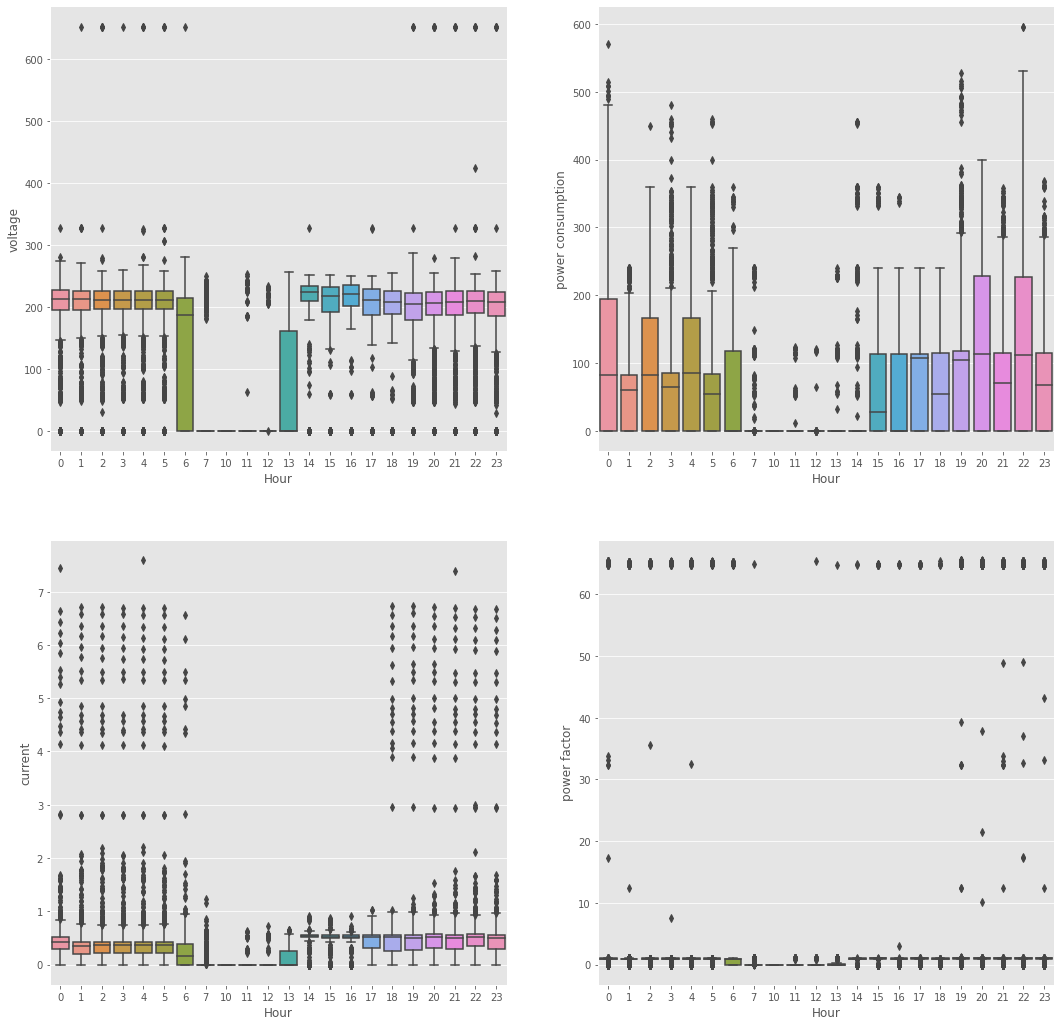

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(18,18))

g = sea.boxplot(x=energy_df.Hour, y=energy_df['voltage'], ax=axes[0][0])
g.set_ylabel('voltage')

g = sea.boxplot(x=energy_df.Hour, y=energy_df['powerConsumption'], ax=axes[0][1])
g.set_ylabel('power consumption')

g = sea.boxplot(x=energy_df.Hour, y=energy_df['current'], ax=axes[1][0])
g.set_ylabel('current')

g = sea.boxplot(x=energy_df.Hour, y=energy_df['powerFactor'], ax=axes[1][1])
g.set_ylabel('power factor')
